In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload
from src.utilities import load_itineraries

In [2]:
#Importing itineraries
itineraries = load_itineraries(weekday=True)  # Change to False for weekend

In [3]:
deep_reload(src)
n=1
print(n)

solver_kwargs = {'_name': 'cbc', 'executable': '/opt/homebrew/bin/cbc'}

itinerary_kwargs={
    'initial_soc':1,
    'final_soc':1,
    'initial_sof':1,
    'final_sof':1,
    'battery_capacity':82*3.6e6,
    'home_charger_likelihood':1,
    'work_charger_likelihood':1,
    'destination_charger_likelihood':.5,
}

# itinerary_kwargs={}
problem=src.optimization.EVCSP(itineraries[n],itinerary_kwargs=itinerary_kwargs)
problem.Solve(solver_kwargs)
print(f'solver status: {problem.solver_status}, '+
      f'solver termination condition: {problem.solver_termination_condition}')
print(f'sic: {problem.sic}')

1
solver status: ok, solver termination condition: optimal
sic: 0.0


In [4]:
itineraries[4]

{'trips':      HOUSEID  PERSONID  TDTRPNUM  STRTTIME  ENDTIME  TRVLCMIN  TRPMILES  \
 8   30000012         1         1       550      605        15     3.395   
 9   30000012         1         2       700      715        15     3.395   
 10  30000012         1         3       730      740        10     1.059   
 11  30000012         1         4       805      815        10     1.014   
 
     TRPTRANS  VEHID  WHYFROM  ...  HHSTFIPS  TDAYDATE  URBAN URBANSIZE  \
 8          4      2        1  ...        36    201607      1         3   
 9          4      2       16  ...        36    201607      1         3   
 10         4      2        1  ...        36    201607      1         3   
 11         4      2       16  ...        36    201607      1         3   
 
     URBRUR  GASPRICE  CENSUS_D  CENSUS_R  CDIVMSAR  VEHTYPE  
 8        1     233.8         2         1        23        3  
 9        1     233.8         2         1        23        3  
 10       1     233.8         2         1  

In [5]:
problem.solution.soc

,0
0,0.780727
1,0.567656
2,0.348382
3,1.000000
4,0.780727
5,0.851618
6,0.632344
7,0.419273
8,0.200000
9,1.000000


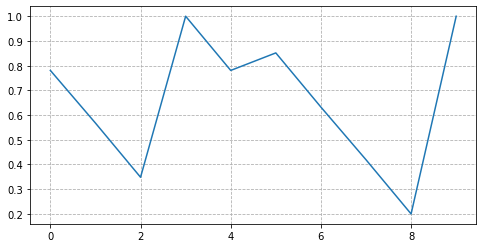

In [6]:
deep_reload(src)

line_kwargs={
    'linewidth':3,
}

axes_kwargs={
    'facecolor':'whitesmoke',
    'ylim':[0,1],
    'xlabel':'Trip/Park Event',
    'ylabel':'SOC [-]',
}

fig,ax=plt.subplots(1,1,figsize=(8,4))
if not hasattr(ax,'__iter__'):
    ax=[ax]
    
ax[0].plot(problem.solution.soc)
# ax[0].plot(problem.solution.sof)
# ax[0].plot(problem.solution.u_cd_cs[0])

_=[ax.grid(ls='--') for ax in ax]

In [24]:
deep_reload(src)

itinerary_kwargs={
	'tiles':5,
	'initial_sof':1,
	'final_sof':1,
    'battery_capacity':40*3.6e6,
	'home_charger_likelihood':1,
	'work_charger_likelihood':0,
	'destination_charger_likelihood':.1
}

experiment_keys=[
    'battery_capacity'
	'home_charger_likelihood',
	'work_charger_likelihood',
	'destination_charger_likelihood',
]

experiment_levels=[
    [10*3.6e6,35*3.6e6,60*3.6e6],
	[0,.25,.5],
	[0,.25,.5],
	[0,.25,.5],
]

experiment_inputs=src.experiments.GenerateExperiment(
	itinerary_kwargs,experiment_keys,experiment_levels)

exp_itineraries=src.experiments.SelectItineraries(itineraries,1,seed=1000)

solver_kwargs={'_name':'cbc','executable':'src/cbc','threads':4}

vehicle_classes=[
    src.optimization.EVCSP,
]

experiment_results=src.experiments.RunExperiment(
    vehicle_classes,
	exp_itineraries,
    experiment_inputs,
    iter_time=1,
    solver_kwargs=solver_kwargs,
    disp=False,
    repititions=3,
)

In [31]:
experiment_results=pkl.load(open('Data/Generated_Data/output_12072023_174102.pkl','rb'))

In [47]:
deep_reload(src)

out=src.experiments.ProcessResults(experiment_results)
out

,tiles,initial_sof,final_sof,battery_capacity,home_charger_likelihood,work_charger_likelihood,destination_charger_likelihood,sic_mean_0,sic_mean_1,sic_mean_2,events_0,events_1,events_2,distance_0,distance_1,distance_2
0,5.0,1.0,1.0,36000000.0,0.00,0.0,0.0,0.053200,0.099544,0.042468,27.653061,27.653061,27.653061,317847.770149,317847.770149,317847.770149
1,5.0,1.0,1.0,126000000.0,0.00,0.0,0.0,0.053200,0.099544,0.042468,27.031250,27.653061,27.653061,304178.335888,317847.770149,317847.770149
2,5.0,1.0,1.0,216000000.0,0.00,0.0,0.0,0.053200,0.099544,0.042468,27.319588,27.653061,27.653061,309446.217959,317847.770149,317847.770149
3,5.0,1.0,1.0,36000000.0,0.25,0.0,0.0,0.006165,0.072199,0.042468,27.653061,27.653061,27.653061,317847.770149,317847.770149,317847.770149
4,5.0,1.0,1.0,126000000.0,0.25,0.0,0.0,0.017563,0.032723,0.042468,27.653061,27.653061,27.653061,317847.770149,317847.770149,317847.770149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,5.0,1.0,1.0,126000000.0,0.25,0.5,0.5,0.005224,0.009083,0.042468,27.653061,27.653061,27.653061,317847.770149,317847.770149,317847.770149
77,5.0,1.0,1.0,216000000.0,0.25,0.5,0.5,0.002659,0.006202,0.042468,27.653061,27.653061,27.653061,317847.770149,317847.770149,317847.770149
78,5.0,1.0,1.0,36000000.0,0.50,0.5,0.5,0.006295,0.025635,0.042468,27.653061,27.653061,27.653061,317847.770149,317847.770149,317847.770149
79,5.0,1.0,1.0,126000000.0,0.50,0.5,0.5,0.002091,0.004081,0.042468,27.653061,27.653061,27.653061,317847.770149,317847.770149,317847.770149


In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [60]:
out['sic_comp'],out['sic_phev'],out['sic_bev']

(0      0.871129
 1      0.871129
 2      0.871129
 3     10.711278
 4      0.863236
         ...    
 76     0.738775
 77     1.332475
 78     3.072494
 79     0.951926
 80     0.021538
 Name: sic_comp, Length: 81, dtype: float64,
 0     0.099544
 1     0.099544
 2     0.099544
 3     0.072199
 4     0.032723
         ...   
 76    0.009083
 77    0.006202
 78    0.025635
 79    0.004081
 80    0.001008
 Name: sic_phev, Length: 81, dtype: float64,
 0     0.053200
 1     0.053200
 2     0.053200
 3     0.006165
 4     0.017563
         ...   
 76    0.005224
 77    0.002659
 78    0.006295
 79    0.002091
 80    0.000987
 Name: sic_bev, Length: 81, dtype: float64)

In [57]:
out['sic_bev']=out['sic_mean_0']
out['sic_phev']=out['sic_mean_1']
out['sic_comp']=(out['sic_mean_1']-out['sic_mean_0'])/out['sic_mean_0']
out['bc']=out['battery_capacity']
out['hcl']=out['home_charger_likelihood']
out['wcl']=out['work_charger_likelihood']
out['dcl']=out['destination_charger_likelihood']

formula_bev=(
    'sic_bev~'+
    'bc*'+
    'hcl*'+
    'wcl*'+
    'dcl'
)
model_bev=smf.ols(formula=formula_bev,data=out).fit()

formula_phev=(
    'sic_phev~'+
    'bc*'+
    'hcl*'+
    'wcl*'+
    'dcl'
)
model_phev=smf.ols(formula=formula_phev,data=out).fit()

formula_comp=(
    'sic_comp~'+
    'bc*'+
    'hcl*'+
    'wcl*'+
    'dcl'
)
model_comp=smf.ols(formula=formula_comp,data=out).fit()

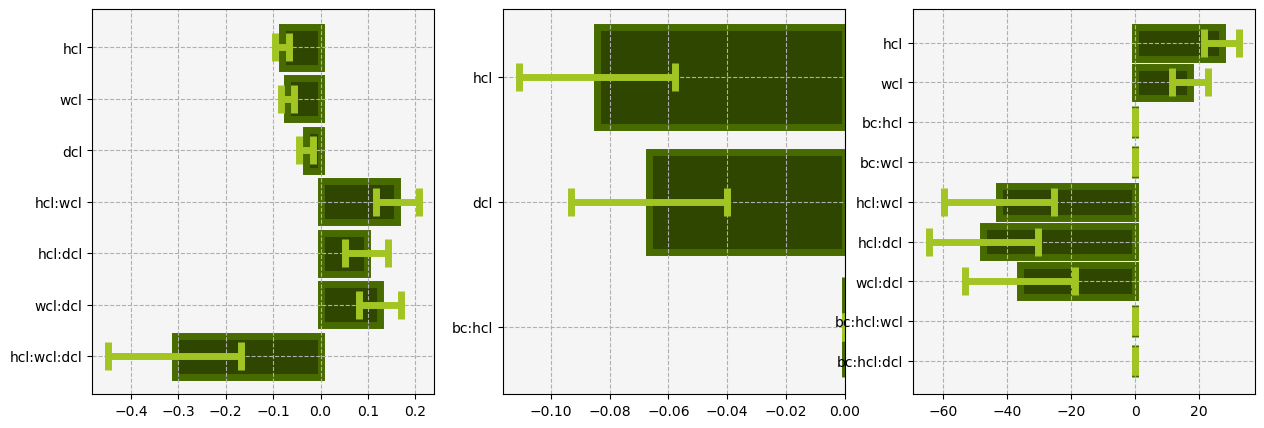

In [58]:
deep_reload(src)

cmap=src.figures.ReturnColorMap('viridis')
cs=src.figures.colors['forest']

bar_kwargs={
    'fc':cs[3],
    'ec':cs[2],
    'lw':5,
    'error_kw':{
        'ecolor':cs[1],
        'capsize':10,
        'capthick':5,
        'lw':5,
    }}

axes_kwargs={
    'facecolor':'whitesmoke',
    # 'xlim':[-.8,.8],
}

alpha=.05

fig,ax=plt.subplots(1,3,figsize=(15,5))

src.figures.FactorsPlot(model_bev,ax=ax[0],alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs)
src.figures.FactorsPlot(model_phev,ax=ax[1],alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs)
src.figures.FactorsPlot(model_comp,ax=ax[2],alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs)

_=[ax.grid(ls='--') for ax in ax]